In [3]:
import cv2 
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils # when visualing out poses
mp_pose = mp.solutions.pose

In [16]:
cap = cv2.VideoCapture(0)
## setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        ret, frame = cap.read() # frame is image from camera
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediappipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

## Determining Joints

<img src = "https://mediapipe.dev/images/mobile/pose_tracking_full_body_landmarks.png" style="height:300px">

In [8]:
cap = cv2.VideoCapture(0)
## setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        ret, frame = cap.read() # frame is image from camera
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
            # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            # Filter out landmarks with low visibility
        except:
            pass
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediappipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
mp_pose.Pose??

In [ ]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

In [34]:
landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value] # why does this have value even tho it didn't detect it. if visiblility is low, don't save the position

x: 0.6142386
y: 2.3633475
z: -0.65662456
visibility: 0.0020882552

In [22]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

x: 0.62809384
y: 1.1210781
z: -0.37526324
visibility: 0.41440323

In [23]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]


x: 0.6687571
y: 1.2022107
z: -0.8656362
visibility: 0.36659306

In [24]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]


x: 0.5560192
y: 1.0103874
z: -1.1541002
visibility: 0.3021175

## Calculate Angles

In [2]:
import math
def calculate_angle(a,b,c):
    # a = np.array(a) # Frist
    # b = np.array(b) # Mid
    # c = np.array(c) # End
    
    # ba = a - b
    # bc = c - b
    
    # v1mag = math.sqrt(ba[0]**2 + ba[1]**2+ba[2]**2)
    # v1norm = [ba[0]/v1mag, ba[1]/v1mag, ba[2]/v1mag]
    
    # v2mag = math.sqrt(bc[0]**2 + bc[1]**2+bc[2]**2)
    # v2norm = [bc[0]/v2mag, bc[1]/v2mag, bc[2]/v2mag]
    
    # res = v1norm[0]*v2norm[0] + v1norm[1]*v2norm[1] + v1norm[2]*v2norm[2]
    # angle = np.arccos(res)
    
    

    # cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    # angle = np.arccos(cosine_angle)
    
    # angle = np.abs(angle * 180.0/np.pi)
    
    # if angle > 180.0:
    #     angle = 360 - angle
        
    ## Using only x,y coordniates
    a = np.array(a) # Frist
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1] - b[1], c[0] -b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians * 180.0/np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
        
    return angle

In [ ]:

    # cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    # angle = np.arccos(cosine_angle)
    
    # angle = np.abs(angle * 180.0/np.pi)
    
    # if angle > 180.0:
    #     angle = 360 - angle
        
    ## Using only x,y coordniates
    # a = np.array(a) # Frist
    # b = np.array(b) # Mid
    # c = np.array(c) # End
    
    # radians = np.arctan2(c[1] - b[1], c[0] -b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    # angle = np.abs(radians * 180.0/np.pi)
    
    # if angle > 180.0:
    #     angle = 360 - angle
        
    return angle

In [39]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [ ]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [6]:
cap = cv2.VideoCapture(0)
## setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        ret, frame = cap.read() # frame is image from camera
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
            # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            # Filter out landmarks with low visibility
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]    
            
            # hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            # shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            # elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]   
            
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualizeq
            cv2.putText(image, 
                        str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)), # controal [640, 480] to window size
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        except:
            pass
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediappipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

## Curl Counter


In [14]:
cap = cv2.VideoCapture(0)

## Curl counter variables
counter = 0
stage = None

## setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        ret, frame = cap.read() # frame is image from camera
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
            # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            # Filter out landmarks with low visibility
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]    
            
            # hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            # shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            # elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]   
            
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize
            cv2.putText(image, 
                        str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)), # controal [640, 480] to window size
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
            
            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage == 'down':
                stage = 'up'
                counter += 1
                print(counter) 
        except:
            pass
        
        # Render curl counter
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        cv2.putText(image, 'REPS', (15,20), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
        cv2.putText(image, str(counter),
                    (10,70),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediappipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10


## Visualize angle vs frame

In [1]:
import matplotlib.pyplot as plt

## Video

In [1]:
# For smoothing a curve
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

### Smoothing a curve function.

In [ ]:
# won't be used though
import numpy as np
from math import factorial
def savitzky_golay(y, window_size, order, deriv=0, rate=1):    
    
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

### Apply smoothing curve filter

In [15]:
cap = cv2.VideoCapture("Steph Curry.mp4")

# Curl counter variables
# counter = 0
# stage = None

times = []
time = 0
left_elbow_angles = []
left_shoulder_angles = []
left_wrist_angles = []
left_hip_angles = []
left_knee_angles = []
right_elbow_angles = []
right_shoulder_angles = []
right_wrist_angles = []
right_hip_angles = []
right_knee_angles = []

## setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        ret, frame = cap.read() # frame is image from camera
       
        if not ret:
            cap.release()
            break
        
        frame_width = int(cap.get(3))
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
            # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            # Filter out landmarks with low visibility
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].z]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].z]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].z]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            # shoulder angle
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

            # wrist angle
            left_index = [landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].x, landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].y]
            right_index = [landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].y]

            # hip angle
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]

            # knee angle
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            # left_ = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

            # hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            # shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            # elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]   
            
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            # left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            # left_wrist_angle = calculate_angle(left_elbow, left_wrist, left_index)
            # left_hip_angle = calculate_angle(left_knee, left_hip, left_shoulder)
            # left_knee_angle = calculate_angle(left_ankle, left_knee, left_hip)

            # right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
            # right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            # right_wrist_angle = calculate_angle(right_elbow, right_wrist, right_index)
            # right_hip_angle = calculate_angle(right_knee, right_hip, right_shoulder)
            # right_knee_angle = calculate_angle(right_ankle, right_knee, right_hip)
            
            # # if time % 5 == 0:
            left_elbow_angles.append(left_elbow_angle)
            # left_shoulder_angles.append(left_shoulder_angle)
            # left_wrist_angles.append(left_wrist_angle)
            # left_hip_angles.append(left_hip_angle)
            # left_knee_angles.append(left_knee_angle)

            # right_elbow_angles.append(right_elbow_angle)
            # right_shoulder_angles.append(right_shoulder_angle)
            # right_wrist_angles.append(right_wrist_angle)
            # right_hip_angles.append(right_hip_angle)
            # right_knee_angles.append(right_knee_angle)

            times.append(time)
            time+=1
            
            # Visualize
            cv2.putText(image, 
                        str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)), # controal [640, 480] to window size
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        except:
            pass
        
        ## draw only relevant points. Do not draw points on a face
        # points_on_face = [1,2,3,4,5,6,7,8,9,10]
        # for i, landmark in enumerate(results.pose_landmarks.landmark):
        #     if (landmark in points_on_face):             
        
        # filtered = [landmark for i, landmark in enumerate(results.pose_landmarks.landmark) if i not in points_on_face]
        # results.pose_landmarks.landmark = filtered
        # results.pose_landmarks
       
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediapipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    
    cap.release()
    cv2.destroyAllWindows()
    
plt.plot(times, left_elbow_angles, color='b', label = 'left_elbow')

## smooth a curve
cubic_interpolation_model = interp1d(times, left_elbow_angles, kind = "cubic")
times = np.array(times)
# X_ = np.linspace(times.min(), times.max(), 50)
Y_ = cubic_interpolation_model(times)

Y_ = savgol_filter(Y_, len(times), 50)
plt.plot(times,Y_, color='r', label='smooth')
# plt.plot(times, left_shoulder_angles, color='r', label='left_shoulder')
# plt.plot(times, left_wrist_angles, color='g', label = 'left wrist')
# plt.plot(times, left_hip_angles, color='y', label = 'left hip')
# plt.plot(times, left_knee_angles, color='m', label = 'left knee')

# plt.plot(times, right_elbow_angles, color='#87CEEB', label = 'right_elbow')
# plt.plot(times, right_shoulder_angles, color='#FFC0CB', label='right_shoulder')
# plt.plot(times, right_wrist_angles, color='#90EE90', label = 'right wrist')
# plt.plot(times, right_hip_angles, color='#FFF01F', label = 'right hip')
# plt.plot(times, right_knee_angles, color='#A020F0', label = 'right knee')
plt.legend()

plt.xlabel('time')
plt.ylabel('angle')
plt.show()


c:\Users\junsu\Anaconda3\envs\3d-body-demo\lib\site-packages\scipy\signal\_savitzky_golay.py:223: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
c:\Users\junsu\Anaconda3\envs\3d-body-demo\lib\site-packages\scipy\signal\_savitzky_golay.py:226: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,


### Show video and graph. Use pause and play function.

#### Show video and graph

In [4]:
#Copied from the above cell
%matplotlib qt
import cv2
import matplotlib.pyplot as plt
import numpy as np

filename = "./videos/JJ1.mp4"
cap = cv2.VideoCapture(filename)
# cap = cv2.VideoCapture("Steph Curry.mp4")
# Curl counter variables
# counter = 0
# stage = None

times = []
time = 0
left_elbow_angles = []
left_shoulder_angles = []
left_wrist_angles = []
left_hip_angles = []
left_knee_angles = []
right_elbow_angles = []
right_shoulder_angles = []
right_wrist_angles = []
right_hip_angles = []
right_knee_angles = []
## setup mediapipe instance
images = []
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        
        ret, frame = cap.read() # frame is image from camera
        
        if not ret:
            cap.release()
            break
        
        frame_width = int(cap.get(3))
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        images.append(image)
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
            # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            # Filter out landmarks with low visibility
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            # shoulder angle
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

            # wrist angle
            left_index = [landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].x, landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].y]
            right_index = [landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].y]

            # hip angle
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]

            # knee angle
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            # left_ = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

            # hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            # shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            # elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]   
            
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            left_wrist_angle = calculate_angle(left_elbow, left_wrist, left_index)
            left_hip_angle = calculate_angle(left_knee, left_hip, left_shoulder)
            left_knee_angle = calculate_angle(left_ankle, left_knee, left_hip)

            right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
            right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            right_wrist_angle = calculate_angle(right_elbow, right_wrist, right_index)
            right_hip_angle = calculate_angle(right_knee, right_hip, right_shoulder)
            right_knee_angle = calculate_angle(right_ankle, right_knee, right_hip)
            
            # if time % 5 == 0:
            left_elbow_angles.append(left_elbow_angle)
            left_shoulder_angles.append(left_shoulder_angle)
            left_wrist_angles.append(left_wrist_angle)
            left_hip_angles.append(left_hip_angle)
            left_knee_angles.append(left_knee_angle)

            right_elbow_angles.append(right_elbow_angle)
            right_shoulder_angles.append(right_shoulder_angle)
            right_wrist_angles.append(right_wrist_angle)
            right_hip_angles.append(right_hip_angle)
            right_knee_angles.append(right_knee_angle)

            times.append(time)
            time+=1
            
            # Visualize
            cv2.putText(image, 
                        str(left_elbow),
                        tuple(np.multiply(left_elbow, [640, 480]).astype(int)), # controal [640, 480] to window size
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        except:
           pass
        
        ## draw only relevant points. Do not draw points on a face
        # points_on_face = [1,2,3,4,5,6,7,8,9,10]
        # for i, landmark in enumerate(results.pose_landmarks.landmark):
        #     if (landmark in points_on_face):             
        
        # filtered = [landmark for i, landmark in enumerate(results.pose_landmarks.landmark) if i not in points_on_face]
        # results.pose_landmarks.landmark = filtered
        # results.pose_landmarks
       
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediapipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    
    cap.release()
    cv2.destroyAllWindows()
    
plt.plot(times, left_elbow_angles, color='b', label = 'left_elbow')

print(len(left_elbow_angles))


## smooth a curve
cubic_interpolation_model = interp1d(times, left_elbow_angles, kind = "cubic")
times = np.array(times)
# X_ = np.linspace(times.min(), times.max(), 50)
Y_ = cubic_interpolation_model(times)

Y_ = savgol_filter(Y_, len(times), 50)
plt.plot(times,Y_, color='r', label='smooth')
# plt.plot(times, left_shoulder_angles, color='r', label='left_shoulder')
# plt.plot(times, left_wrist_angles, color='g', label = 'left wrist')
# plt.plot(times, left_hip_angles, color='y', label = 'left hip')
# plt.plot(times, left_knee_angles, color='m', label = 'left knee')

# plt.plot(times, right_elbow_angles, color='#87CEEB', label = 'right_elbow')
# plt.plot(times, right_shoulder_angles, color='#FFC0CB', label='right_shoulder')
# plt.plot(times, right_wrist_angles, color='#90EE90', label = 'right wrist')
# plt.plot(times, right_hip_angles, color='#FFF01F', label = 'right hip')
# plt.plot(times, right_knee_angles, color='#A020F0', label = 'right knee')
plt.legend()

plt.xlabel('time')
plt.ylabel('angle')
plt.show()

################ show video and graph ######################
cap = cv2.VideoCapture(filename)

try:
    frames = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))
except AttributeError:
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fig, ax = plt.subplots(1,1)
plt.ion()
plt.show()

#Setup a dummy path
# x = np.linspace(0,width,frames)
x = times
# y = x/2. + 100*np.sin(2.*np.pi*x/1200)
# y = Y_
y = -Y_
# need this to plot graph as the original. otherwise upside down
left_elbow_angles = (-np.array(left_elbow_angles)).tolist()

print(len(images))
print(len(times))
print(len(y))

# for i in enumerate(times): 
for i, image in enumerate(images):
    fig.clf()
    flag, frame = cap.read()


    plt.imshow(image)
    times = times/np.max(times)*width
    # plt.plot(x,y,'k-', lw=2)
    plt.plot(times, y, 'k-', lw=2)
    plt.plot(times, left_elbow_angles, 'g-', lw=2)
    plt.plot(times[i],y[i],'or')
    plt.pause(0.001)
    
    
    
    # # Make detection
    # results = pose.process(image) # image here is RGB

    # # Recolor back to BGR
    # image.flags.writeable = True
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break        
        


64
64

c:\Users\junsu\Anaconda3\envs\3d-body-demo\lib\site-packages\scipy\signal\_savitzky_golay.py:223: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
c:\Users\junsu\Anaconda3\envs\3d-body-demo\lib\site-packages\scipy\signal\_savitzky_golay.py:226: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,



64
64


#### Using seaborn

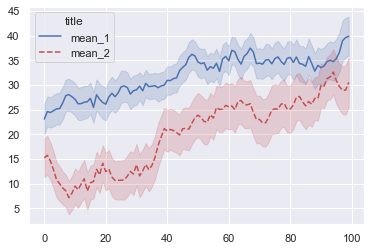

In [2]:
# This is just a snippet how to use seaborn
# https://stackoverflow.com/questions/61368805/how-to-plot-shaded-error-bands-with-seaborn

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
N = 100
x = np.arange(N)
mean_1 = 25 + np.random.normal(0.1, 1, N).cumsum()
std_1 = 3 + np.random.normal(0, .08, N).cumsum()

mean_2 = 15 + np.random.normal(0.2, 1, N).cumsum()
std_2 = 4 + np.random.normal(0, .1, N).cumsum()

plt.plot(x, mean_1, 'b-', label='mean_1')
plt.fill_between(x, mean_1 - std_1, mean_1 + std_1, color='b', alpha=0.2)
plt.plot(x, mean_2, 'r--', label='mean_2')
plt.fill_between(x, mean_2 - std_2, mean_2 + std_2, color='r', alpha=0.2)

plt.legend(title='title')
plt.show()

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Copied from the above cell
%matplotlib qt
import cv2
import matplotlib.pyplot as plt



import mediapipe as mp

# For smoothing a curve
# import numpy as np
from scipy.interpolate import interp1d
# import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
# import numpy as np
mp_drawing = mp.solutions.drawing_utils # when visualing out poses
mp_pose = mp.solutions.pose

# filename = "./videos/JJ1.mp4"
filenames = ["./videos/JJ1.mp4", "./videos/Steph Curry.mp4"]


# cap = cv2.VideoCapture("Steph Curry.mp4")
# Curl counter variables
# counter = 0
# stage = None

times = []
time = 0
left_elbow_angles = []
left_shoulder_angles = []
left_wrist_angles = []
left_hip_angles = []
left_knee_angles = []
right_elbow_angles = []
right_shoulder_angles = []
right_wrist_angles = []
right_hip_angles = []
right_knee_angles = []
## setup mediapipe instance
images = []
y_values =[]
for filename in filenames:
    # clear list 
    left_elbow_angles.clear()
    times = []
    time = 0
    time_for_seaborn= []
    
    cap = cv2.VideoCapture(filename)

    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
        while cap.isOpened():
            
            ret, frame = cap.read() # frame is image from camera
            
            if not ret:
                cap.release()
                break
            
            frame_width = int(cap.get(3))
            
            # Recolor image
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False # save memory
            images.append(image)
            
            # Make detection
            results = pose.process(image) # image here is RGB
            
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
                # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
                # Filter out landmarks with low visibility
                left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
                right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
                right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

                # shoulder angle
                left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

                # wrist angle
                left_index = [landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].x, landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].y]
                right_index = [landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].y]

                # hip angle
                left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]

                # knee angle
                left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
                right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
                
                # left_ = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

                # hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                # shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                # elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]   
                
                left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
                left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
                left_wrist_angle = calculate_angle(left_elbow, left_wrist, left_index)
                left_hip_angle = calculate_angle(left_knee, left_hip, left_shoulder)
                left_knee_angle = calculate_angle(left_ankle, left_knee, left_hip)

                right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
                right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
                right_wrist_angle = calculate_angle(right_elbow, right_wrist, right_index)
                right_hip_angle = calculate_angle(right_knee, right_hip, right_shoulder)
                right_knee_angle = calculate_angle(right_ankle, right_knee, right_hip)
                
                # if time % 5 == 0:
                left_elbow_angles.append(left_elbow_angle)
                left_shoulder_angles.append(left_shoulder_angle)
                left_wrist_angles.append(left_wrist_angle)
                left_hip_angles.append(left_hip_angle)
                left_knee_angles.append(left_knee_angle)

                right_elbow_angles.append(right_elbow_angle)
                right_shoulder_angles.append(right_shoulder_angle)
                right_wrist_angles.append(right_wrist_angle)
                right_hip_angles.append(right_hip_angle)
                right_knee_angles.append(right_knee_angle)

                times.append(time)
                time+=1
                
                # Visualize
                cv2.putText(image, 
                            str(left_elbow),
                            tuple(np.multiply(left_elbow, [640, 480]).astype(int)), # controal [640, 480] to window size
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
            except:
                pass
            
            ## draw only relevant points. Do not draw points on a face
            # points_on_face = [1,2,3,4,5,6,7,8,9,10]
            # for i, landmark in enumerate(results.pose_landmarks.landmark):
            #     if (landmark in points_on_face):             
            
            # filtered = [landmark for i, landmark in enumerate(results.pose_landmarks.landmark) if i not in points_on_face]
            # results.pose_landmarks.landmark = filtered
            # results.pose_landmarks
        
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
            
            cv2.imshow('Mediapipe Feed', image)
            
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

                
        cap.release()
        cv2.destroyAllWindows()
    
    
    plt.plot(times, left_elbow_angles, color='b', label = 'left_elbow')

    ## smooth a curve
    cubic_interpolation_model = interp1d(times, left_elbow_angles, kind = "cubic")
    times = np.array(times)
    # X_ = np.linspace(times.min(), times.max(), 50)
    Y_ = cubic_interpolation_model(times)

    Y_ = savgol_filter(Y_, len(times), 50)
    plt.plot(times,Y_, color='r', label='smooth')
    # plt.plot(times, left_shoulder_angles, color='r', label='left_shoulder')
    # plt.plot(times, left_wrist_angles, color='g', label = 'left wrist')
    # plt.plot(times, left_hip_angles, color='y', label = 'left hip')
    # plt.plot(times, left_knee_angles, color='m', label = 'left knee')

    # plt.plot(times, right_elbow_angles, color='#87CEEB', label = 'right_elbow')
    # plt.plot(times, right_shoulder_angles, color='#FFC0CB', label='right_shoulder')
    # plt.plot(times, right_wrist_angles, color='#90EE90', label = 'right wrist')
    # plt.plot(times, right_hip_angles, color='#FFF01F', label = 'right hip')
    # plt.plot(times, right_knee_angles, color='#A020F0', label = 'right knee')
    plt.legend()

    plt.xlabel('time')
    plt.ylabel('angle')
    plt.show()

    ################ show video and graph ######################
    # filename = './Steph Curry.mp4'
    cap = cv2.VideoCapture(filename)

    try:
        frames = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
        width  = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))
    except AttributeError:
        frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fig, ax = plt.subplots(1,1)
    plt.ion()
    plt.show()

    #Setup a dummy path
    # x = np.linspace(0,width,frames)
    x = times
    # y = x/2. + 100*np.sin(2.*np.pi*x/1200)
    # y = Y_
    y = -Y_
    
    ## this is for seaborn
    # if y_mean.len() == 0:
    #     y_mean = y
    # else:
    #     y_mean = [sum(x) for x in zip(y_mean, y)]

    # y is array. convert it to list    
    y_values += list(y)
        
    # need this to plot graph as the original. otherwise upside down
    left_elbow_angles = (-np.array(left_elbow_angles)).tolist()

    print(len(images))
    print(len(times))
    print(len(y))

    # # for i in enumerate(times): 
    # for i, image in enumerate(images):
    #     fig.clf()
    #     flag, frame = cap.read()


    #     plt.imshow(image)
    #     times = times/np.max(times)*width
    #     # plt.plot(x,y,'k-', lw=2)
    #     plt.plot(times, y, 'k-', lw=2)
    #     plt.plot(times, left_elbow_angles, 'g-', lw=2)
    #     plt.plot(times[i-1],y[i-1],'or')
    #     plt.pause(0.001)
        
        
        
    #     # # Make detection
    #     # results = pose.process(image) # image here is RGB

    #     # # Recolor back to BGR
    #     # image.flags.writeable = True
    #     # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    #     if cv2.waitKey(10) & 0xFF == ord('q'):
    #         break        


    


   

def show_margin(y_values):
    print(f'y_values length: {len(y_values)}')
    y_values = np.array(y_values).reshape(2, -1)
    y_values = np.mean(y_values, axis=0)

    print(f'y_values.shape: {y_values.shape}')

    x_axis = np.arange(len(y_values))   
    plt.plot(x_axis, y_values, 'b-', label='y_value')
    plt.fill_between(x_axis, y_values-10, y_values+10, color = 'b', alpha=0.2)

    plt.legend(title='test')
    plt.show()


show_margin(y_values)  

c:\Users\junsu\Anaconda3\envs\3d-body-demo\lib\site-packages\scipy\signal\_savitzky_golay.py:223: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
c:\Users\junsu\Anaconda3\envs\3d-body-demo\lib\site-packages\scipy\signal\_savitzky_golay.py:226: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,


64
64
64


c:\Users\junsu\Anaconda3\envs\3d-body-demo\lib\site-packages\scipy\signal\_savitzky_golay.py:223: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
c:\Users\junsu\Anaconda3\envs\3d-body-demo\lib\site-packages\scipy\signal\_savitzky_golay.py:226: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,


180
116
116
y_values length: 180
y_values.shape: (90,)


#### Plotting animation for pause and play function

In [41]:
# This cell is a simple demo of animation
# need PyQt5 to be installed for matplotlib qt
%matplotlib qt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


class PauseAnimation:
    def __init__(self):
        fig, ax = plt.subplots()
        ax.set_title('Press any key to pause/resume the animation')
        x = np.linspace(-0.1, 0.1, 1000)

        # Start with a normal distribution
        self.n0 = (1.0 / ((4 * np.pi * 2e-4 * 0.1) ** 0.5)
                   * np.exp(-x ** 2 / (4 * 2e-4 * 0.1)))
        self.p, = ax.plot(x, self.n0)

        self.animation = animation.FuncAnimation(
            fig, self.update, frames=200, interval=50, blit=True)
        self.paused = False
        # 'key_press_event' for keyboard
        # 'button_press_event' for mouse button
        fig.canvas.mpl_connect('key_press_event', self.toggle_pause)

    def toggle_pause(self, *args, **kwargs):
        if self.paused:
            self.animation.resume()
        else:
            self.animation.pause()
        self.paused = not self.paused

    def update(self, i):
        self.n0 += i / 100 % 5
        self.p.set_ydata(self.n0 % 20)
        return (self.p,)


pa = PauseAnimation()
plt.show()

In [ ]:
#Copied from the above cell
%matplotlib qt
import cv2
import matplotlib.pyplot as plt
import numpy as np

cap = cv2.VideoCapture("Steph Curry.mp4")

# Curl counter variables
# counter = 0
# stage = None

times = []
time = 0
left_elbow_angles = []
left_shoulder_angles = []
left_wrist_angles = []
left_hip_angles = []
left_knee_angles = []
right_elbow_angles = []
right_shoulder_angles = []
right_wrist_angles = []
right_hip_angles = []
right_knee_angles = []
## setup mediapipe instance
images = []
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        
        ret, frame = cap.read() # frame is image from camera
        
        if not ret:
            cap.release()
            break
        
        frame_width = int(cap.get(3))
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        images.append(image)
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
            # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            # Filter out landmarks with low visibility
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            # shoulder angle
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

            # wrist angle
            left_index = [landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].x, landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].y]
            right_index = [landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].y]

            # hip angle
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]

            # knee angle
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            # left_ = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

            # hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            # shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            # elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]   
            
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            left_wrist_angle = calculate_angle(left_elbow, left_wrist, left_index)
            left_hip_angle = calculate_angle(left_knee, left_hip, left_shoulder)
            left_knee_angle = calculate_angle(left_ankle, left_knee, left_hip)

            right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
            right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            right_wrist_angle = calculate_angle(right_elbow, right_wrist, right_index)
            right_hip_angle = calculate_angle(right_knee, right_hip, right_shoulder)
            right_knee_angle = calculate_angle(right_ankle, right_knee, right_hip)
            
            # if time % 5 == 0:
            left_elbow_angles.append(left_elbow_angle)
            left_shoulder_angles.append(left_shoulder_angle)
            left_wrist_angles.append(left_wrist_angle)
            left_hip_angles.append(left_hip_angle)
            left_knee_angles.append(left_knee_angle)

            right_elbow_angles.append(right_elbow_angle)
            right_shoulder_angles.append(right_shoulder_angle)
            right_wrist_angles.append(right_wrist_angle)
            right_hip_angles.append(right_hip_angle)
            right_knee_angles.append(right_knee_angle)

            times.append(time)
            time+=1
            
            # Visualize
            cv2.putText(image, 
                        str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)), # controal [640, 480] to window size
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        except:
            pass
        
        ## draw only relevant points. Do not draw points on a face
        # points_on_face = [1,2,3,4,5,6,7,8,9,10]
        # for i, landmark in enumerate(results.pose_landmarks.landmark):
        #     if (landmark in points_on_face):             
        
        # filtered = [landmark for i, landmark in enumerate(results.pose_landmarks.landmark) if i not in points_on_face]
        # results.pose_landmarks.landmark = filtered
        # results.pose_landmarks
       
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediapipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    
    cap.release()
    cv2.destroyAllWindows()
    
plt.plot(times, left_elbow_angles, color='b', label = 'left_elbow')

## smooth a curve
cubic_interpolation_model = interp1d(times, left_elbow_angles, kind = "cubic")
times = np.array(times)
# X_ = np.linspace(times.min(), times.max(), 50)
Y_ = cubic_interpolation_model(times)

Y_ = savgol_filter(Y_, len(times), 50)
plt.plot(times,Y_, color='r', label='smooth')
# plt.plot(times, left_shoulder_angles, color='r', label='left_shoulder')
# plt.plot(times, left_wrist_angles, color='g', label = 'left wrist')
# plt.plot(times, left_hip_angles, color='y', label = 'left hip')
# plt.plot(times, left_knee_angles, color='m', label = 'left knee')

# plt.plot(times, right_elbow_angles, color='#87CEEB', label = 'right_elbow')
# plt.plot(times, right_shoulder_angles, color='#FFC0CB', label='right_shoulder')
# plt.plot(times, right_wrist_angles, color='#90EE90', label = 'right wrist')
# plt.plot(times, right_hip_angles, color='#FFF01F', label = 'right hip')
# plt.plot(times, right_knee_angles, color='#A020F0', label = 'right knee')
plt.legend()

plt.xlabel('time')
plt.ylabel('angle')
plt.show()

################ show video and graph ######################
filename = './Steph Curry.mp4'
cap = cv2.VideoCapture(filename)

try:
    frames = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))
except AttributeError:
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fig, ax = plt.subplots(1,1)
plt.ion()
plt.show()


x = times
y = -Y_

# need this to plot graph as the original. otherwise upside down
left_elbow_angles = (-np.array(left_elbow_angles)).tolist()
for i, image in enumerate(images): 

    fig.clf()
    flag, frame = cap.read()
    # image.flags.writeable = False # save memory
    plt.imshow(image)
    # match plot size with video
    times = times/np.max(times)*width
    
    plt.plot(times, y, 'k-', lw=2)
    plt.plot(times, left_elbow_angles, 'g-', lw=2)
    plt.plot(times[i],y[i],'or')
    plt.pause(0.001)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break        
        


## Camera

In [21]:
cap = cv2.VideoCapture(0)

times = []
time = 0
left_elbow_angles = []
left_shoulder_angles = []
left_wrist_angles = []
left_hip_angles = []
left_knee_angles = []
right_elbow_angles = []
right_shoulder_angles = []
right_wrist_angles = []
right_hip_angles = []
right_knee_angles = []
## setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: #.Pose access pose estimation model, #min_tracking_confidence tracks state
    while cap.isOpened():
        ret, frame = cap.read() # frame is image from camera
        
        # Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False # save memory
        
        # Make detection
        results = pose.process(image) # image here is RGB
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark # hold landamrks. including x,y,z. Use this for calculating angles
            # print(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX])
            # Filter out landmarks with low visibility
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].z]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].z]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].z]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            # shoulder angle
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

            # wrist angle
            left_index = [landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].x, landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].y]
            right_index = [landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value].y]

            # hip angle
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]

            # knee angle
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            # left_ = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

            # hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            # shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            # elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]   
            
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            # left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            # left_wrist_angle = calculate_angle(left_elbow, left_wrist, left_index)
            # left_hip_angle = calculate_angle(left_knee, left_hip, left_shoulder)
            # left_knee_angle = calculate_angle(left_ankle, left_knee, left_hip)

            # right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
            # right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            # right_wrist_angle = calculate_angle(right_elbow, right_wrist, right_index)
            # right_hip_angle = calculate_angle(right_knee, right_hip, right_shoulder)
            # right_knee_angle = calculate_angle(right_ankle, right_knee, right_hip)
            
            # if time % 5 == 0:
            left_elbow_angles.append(left_elbow_angle)
            # left_shoulder_angles.append(left_shoulder_angle)
            # left_wrist_angles.append(left_wrist_angle)
            # left_hip_angles.append(left_hip_angle)
            # left_knee_angles.append(left_knee_angle)

            # right_elbow_angles.append(right_elbow_angle)
            # right_shoulder_angles.append(right_shoulder_angle)
            # right_wrist_angles.append(right_wrist_angle)
            # right_hip_angles.append(right_hip_angle)
            # right_knee_angles.append(right_knee_angle)

            times.append(time)
            time+=1
            
            # Visualize
            cv2.putText(image, 
                        str(left_elbow_angle),
                        tuple(np.multiply(left_elbow[0:2], [640, 480]).astype(int)), # controal [640, 480] to window size
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        except:
            pass
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) # image here is BGR
        
        cv2.imshow('Mediappipe Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    
plt.plot(times, left_elbow_angles, color='b', label = 'left_elbow')
# plt.plot(times, left_shoulder_angles, color='r', label='left_shoulder')
# plt.plot(times, left_wrist_angles, color='g', label = 'left wrist')
# plt.plot(times, left_hip_angles, color='y', label = 'left hip')
# plt.plot(times, left_knee_angles, color='m', label = 'left knee')

# plt.plot(times, right_elbow_angles, color='#87CEEB', label = 'right_elbow')
# plt.plot(times, right_shoulder_angles, color='#FFC0CB', label='right_shoulder')
# plt.plot(times, right_wrist_angles, color='#90EE90', label = 'right wrist')
# plt.plot(times, right_hip_angles, color='#FFF01F', label = 'right hip')
# plt.plot(times, right_knee_angles, color='#A020F0', label = 'right knee')
plt.legend()

plt.xlabel('time')
plt.ylabel('angle')

Text(0, 0.5, 'angle')

In [26]:
a = [1,2,3]
b = (-np.array(a)).tolist()
print(b)

[-1, -2, -3]
